In [1]:
%load_ext autoreload
import sys
sys.path.append('../..')
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

from faces_clustering import get_files_folder, VideoClustering, is_video

Using TensorFlow backend.


In [2]:
videos_path = '/home/paulo/Documentos/testes/'
video_urls = get_files_folder(videos_path, is_video)

In [3]:
video_clustering = VideoClustering('senet50', 'agglomerative', verbose=2)

Processing /home/paulo/Documentos/testes/starwars.mp4
extracting frames
Frames already extracted.
extracting embeddings



clustering


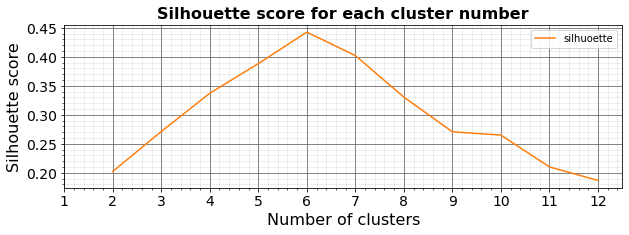

Best cluster number is 6
Processing /home/paulo/Documentos/testes/bolso_daciolo.mp4
extracting frames
Frames already extracted.
extracting embeddings



clustering


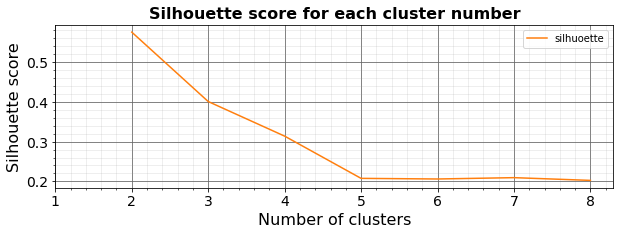

Best cluster number is 2
Processing /home/paulo/Documentos/testes/wagner_moura.mp4
extracting frames
Frames already extracted.
extracting embeddings



clustering


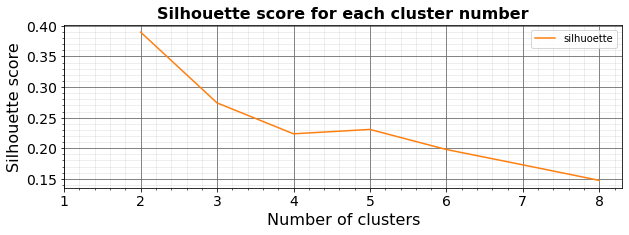

Best cluster number is 2



In [4]:
for video_url in tqdm(video_urls):
    embs = video_clustering.cluster(video_url,fps=0.1)